## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

import pingouin as pg
import researchpy   

## 讀入資料

In [2]:
df_train = pd.read_csv("./D36-41 探索性資料分析 (EDA)_Dataset/Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
df_train['Survived_cate'] = df_train['Survived'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [4]:
# 連續型 vs 離散型
# 取出無遺失值的數據
data = df_train[['Age','Survived_cate']].dropna()
display(data)

,Age,Survived_cate
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [5]:
# 運用 pg.anova 計算三種變異數
aov = pg.anova(dv='Age', between='Survived_cate', data=data, detailed=True)
display(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [6]:
# 變異數換算得到 Eta Squared (𝜼^𝟐)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print('etasq:', etaSq)

etasq: 0.0059630974469252


In [7]:
def judgment_etaSq(etaSq):
    for condition in {'Negligible': .01,
                      'Small': .06,
                      'Medium': .14}.items():
        if etaSq < condition[1]:
            return condition[0]
    return 'Large'
judgment_etaSq(etaSq)

'Negligible'

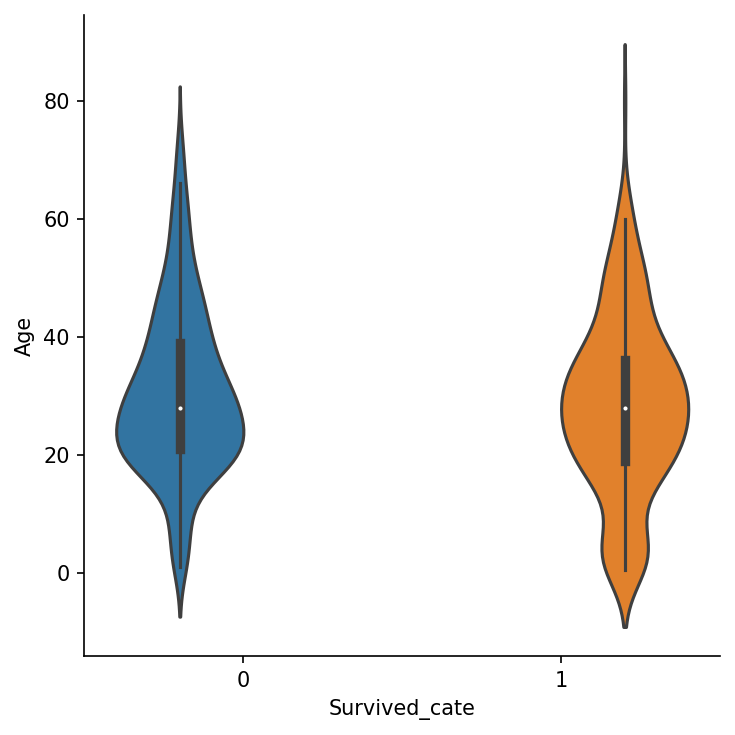

In [8]:
plt.rcParams["figure.dpi"] = 150
g = sns.catplot(x="Survived_cate", y="Age", hue="Survived_cate", data=data, kind="violin")
plt.show()

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [9]:
# 離散型 vs 離散型
# 用交叉列連表(contingency table)，來整理兩個類別型的資料
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
display(contTable)

# 計算資料自由度 df*
df = min(contTable.shape[0], contTable.shape[1]) - 1
print(df)

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


1


In [10]:
# 運用 researchpy 套件，計算出 Cramer’s V 係數
# 這邊用卡方檢定獨立性，所以採用的 test 參數為卡方 "test =" argument.
# 採用的變數在這個模組中，會自己根據資料集來判斷，Cramer's Phi if it a 2x2 table, or Cramer's V is larger than 2x2.
rosstab, res = researchpy.crosstab(df_train['Survived_cate'], df_train['Sex'], test='chi-square')
CramerV = res.loc[2, 'results']
print(res, "\n\nCramer's value is", CramerV)

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434 

Cramer's value is 0.5434


In [11]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df, V):
    df = df if df in range(1,5) else 5
    for case in {1: {'negligible': .1,
                     'small': .3,
                     'medium': .5},
                 2: {'negligible': .07,
                     'small': .21,
                     'medium': .35},
                 3: {'negligible': .06,
                     'small': .17,
                     'medium': .29},
                 4: {'negligible': .05,
                     'small': .15,
                     'medium': .25},
                 5: {'negligible': .05,
                     'small': .13,
                     'medium': .22}}.items():
            for condition in case[df].items():
                if V < condition[1]:
                    return condition[0]
    return 'Large'
judgment_CramerV(df, CramerV)

'Large'

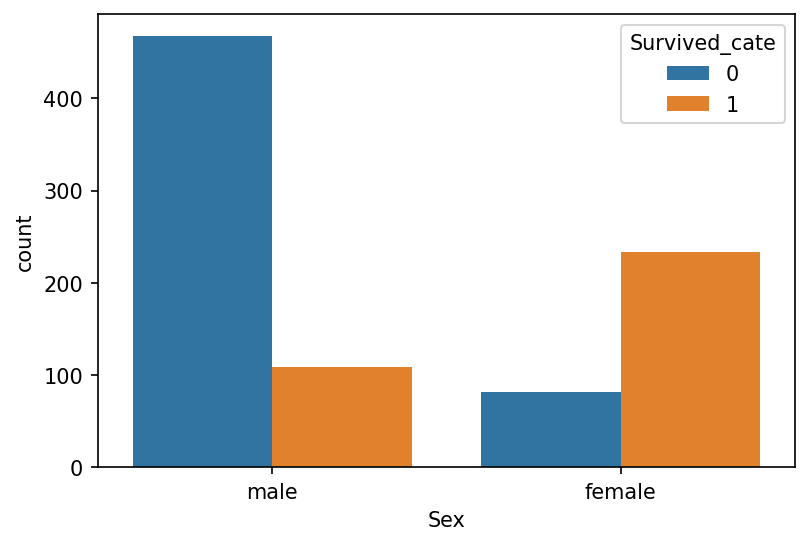

In [12]:
g= sns.countplot(x="Sex", hue="Survived_cate", data=df_train)
plt.show()

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [13]:
# 連續型 vs 連續型
data = df_train[['Age','Fare']].dropna()
corr, _ = stats.pearsonr(data['Age'], data['Fare'])
print(corr)

0.09606669176903891


In [14]:
def judgment_corr(corr):
    for condition in {'Negligible': .1,
                      'Small': .3,
                      'Medium': .5}.items():
        if etaSq < condition[1]:
            return condition[0]
    return 'Large'
judgment_corr(corr)

'Negligible'

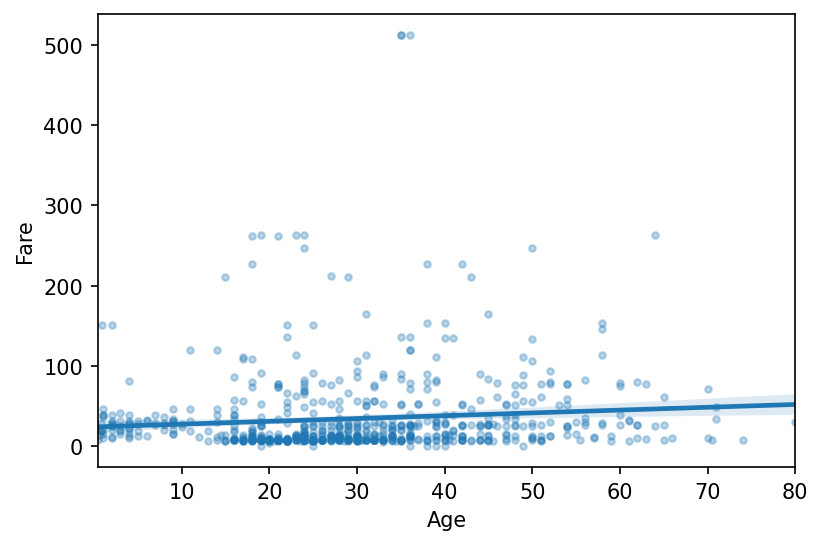

In [15]:
g = sns.regplot(x="Age", y="Fare", scatter_kws={'s': 10, 'alpha': 0.3}, data=data)
plt.show()